# Import the Libraries

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically: X1 Relative Compactness X2 Surface Area X3 Wall Area X4 Roof Area X5 Overall Height X6 Orientation X7 Glazing Area X8 Glazing Area Distribution y1 Heating Load y2 Cooling Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data from csv
df = pd.read_csv('ENB2012_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
columns = ['Rel_Comp', 'Surf_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Dist', 'Heating_Load', 'Cooling_Load']

In [5]:
df.columns = columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Rel_Comp             768 non-null float64
Surf_Area            768 non-null float64
Wall_Area            768 non-null float64
Roof_Area            768 non-null float64
Overall_Height       768 non-null float64
Orientation          768 non-null int64
Glazing_Area         768 non-null float64
Glazing_Area_Dist    768 non-null int64
Heating_Load         768 non-null float64
Cooling_Load         768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.head()

,Rel_Comp,Surf_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Dist,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df.describe()

,Rel_Comp,Surf_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Dist,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## EDA

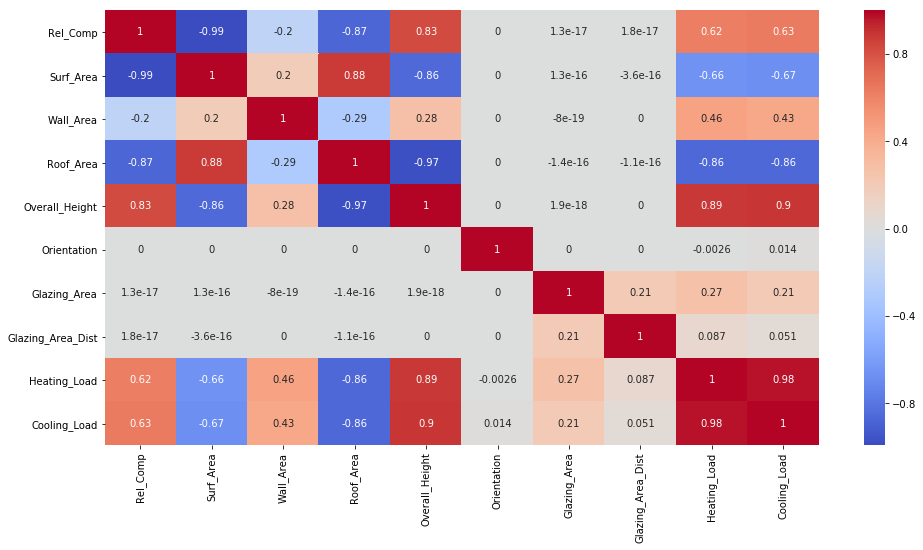

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Based on the correlation of the variables to the target classes, Overall Height is the most correlated followed by Roof Area for negative correlations and finally 'orientation' is the least correlated

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


In [11]:
X = df[['Rel_Comp', 'Surf_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Dist']]
Y1 = df['Heating_Load']
Y2 = df['Cooling_Load']

In [12]:
rf = ExtraTreesRegressor()
rfe = RFE(rf, 3)
fit = rfe.fit(X, Y1)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False  True  True False False False]
Feature Ranking:  [4 1 3 1 1 6 2 5]


'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

In [13]:
rf = ExtraTreesRegressor()
rfe = RFE(rf, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False False  True False  True False]
Feature Ranking:  [2 1 3 6 1 5 1 4]


'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import cross_validation

D:\Anaconda\envs\tfdeeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
num_instances = len(X)

In [16]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('SVM', SVR()))
models.append(('KNN', KNeighborsRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit model
    model.fit(X, Y1)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=101)
    cv_results = cross_validation.cross_val_score(model, X, Y1, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.894327 (0.064875)
RandomForest: 0.968619 (0.083941)
ExtraTreesRegressor: 0.968791 (0.082243)
SVM: 0.837300 (0.149457)
KNN: 0.885004 (0.194983)


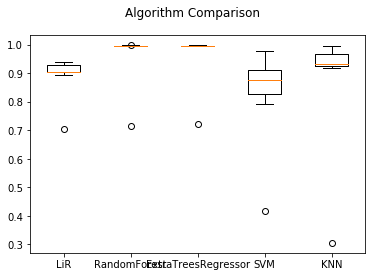

In [17]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

For Hot Load, the best model to predict the Hot Load is using the RandomForestRegressor,  ExtraTressRegressor based on the standard deviation as well as the mean.

In [18]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('SVM', SVR()))
models.append(('KNN', KNeighborsRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit model
    model.fit(X, Y2)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=101)
    cv_results = cross_validation.cross_val_score(model, X, Y2, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results. mean(), cv_results.std())
    print(msg)

LiR: 0.876912 (0.033165)
RandomForest: 0.964250 (0.024618)
ExtraTreesRegressor: 0.949243 (0.022136)
SVM: 0.859163 (0.076793)
KNN: 0.924107 (0.088863)


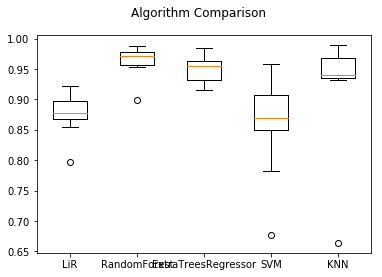

In [19]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

The random forest are the best estimators/models for 'cooling_load', they can be further explored.

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
#from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, roc_curve, auc

Using TensorFlow backend.


In [21]:
rf = RandomForestRegressor()
rf.fit(X, Y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
fake_X = df.iloc[0:8, 0:8]

In [38]:
rf.predict(fake_X)

array([ 15.55 ,  15.55 ,  15.55 ,  15.55 ,  21.088,  21.336,  20.935,
        20.167])

In [42]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
cvscores = []
for train, test in kfold.split(X, Y1):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X.iloc[train], Y1.iloc[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X.iloc[test], Y1.iloc[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

D:\Anaconda\envs\tfdeeplearning\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", input_dim=8, kernel_initializer="uniform")`
  
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_constraint=<keras.con..., activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
D:\Ana

score: 89.82%
score: 95.06%
score: 92.40%
score: 91.25%
score: 93.53%
93.53% (+/- 0.00%)


In [48]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=101)
cvscores = []
for train, test in kfold.split(X, Y2):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X.iloc[train], Y2.iloc[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X.iloc[test], Y2.iloc[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

D:\Anaconda\envs\tfdeeplearning\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", input_dim=8, kernel_initializer="uniform")`
  
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_constraint=<keras.con..., activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
D:\Ana

score: 92.92%
score: 90.23%
score: 91.37%
91.37% (+/- 0.00%)


In [52]:
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))
    model.compile(loss='mean_absolute_error', optimizer='sgd')


D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", input_dim=8, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_constraint=<keras.con..., activation="relu", kernel_initializer="uniform")`
  """
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  import sys
D:\Anaconda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  


In [53]:
model.fit(X, Y1)

Epoch 1/1
768/768 [==============================] - 1s 875us/step - loss: 21.7605


In [54]:
model.predict(fake_X)

array([[ 0.22629163],
       [ 0.22629969],
       [ 0.22630775],
       [ 0.2263158 ],
       [ 0.22641149],
       [ 0.22641955],
       [ 0.22642761],
       [ 0.22643568]], dtype=float32)